In [1]:
import networkx as nx
import numpy as np
import random
random.seed;
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg
import time
import math
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle

import sys
sys.path += ['/Package'] # put here your directory
from clustering import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
t0 = time.time()
n = 5000 # number of nodes
fraction = int(n/2) # size of each block
assortativity = 1 # sign of c_in - c_out

classes = np.zeros(n) 
classes[:fraction] = 1 # class assignment (0 or 1)


### Parameters of the generative model ###

c_out = 2
c_in = 14

# step distribution of the vector theta

theta = np.ones(n)*4
theta[:int(n/4)] = 1
theta[int(2*n/4):int(3*n/4)] = 1
theta = theta/np.mean(theta)

# power law distribution of the vector theta

theta1 = np.random.uniform(3,10,n)**4
theta1 = theta1/np.mean(theta1)



########################################

A = adj(c_in,c_out,theta,fraction) # creation of the adjacency matrix
d = np.sum(A.astype(float),axis = 0) # vector of the degree
phi = np.mean(theta**2) # second moment of the vector q
c = 0.5*(c_in+c_out) # average degree
r = (c_in + c_out)/(c_in - c_out) # our proposed value for r
r_saa = np.sqrt(c*phi) # Saade et al's proposed value for r
alpha = (c_in - c_out)/np.sqrt(c) # control parameter
predict, eigenvalues, X, ov = BH(A, classes,r,assortativity)
predict_saa, eigenvalues_saa, X_saa, ov_saa = BH(A, classes,r_saa,assortativity)
v = X[:,1]
w = X_saa[:,1]

A1 = adj(c_in,c_out,theta1,fraction) # creation of the adjacency matrix
d1 = np.sum(A1.astype(float),axis = 0) # vector of the degree
phi = np.mean(theta**2) # second moment of the vector q
r_saa1 = np.sqrt(c*phi) # Saade et al's proposed value for r
predict1, eigenvalues1, X1, ov1 = BH(A1, classes,r,assortativity)
predict_saa1, eigenvalues_saa1, X_saa1, ov_saa1 = BH(A1, classes,r_saa1,assortativity)
v1 = X1[:,1]
w1 = X_saa1[:,1]

print(time.time()-t0)

36.49572253227234


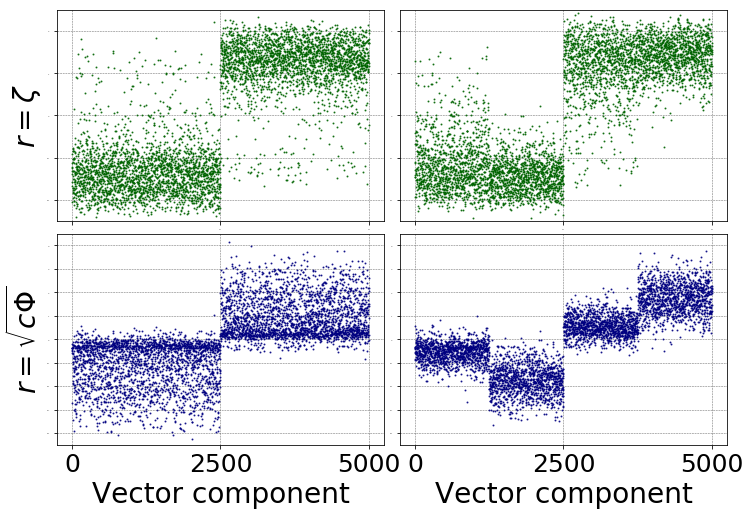

In [3]:
fig = plt.figure(figsize = (12,8))
alpha_1 = 0.8
alpha_2 = 0.8
fs2 = 28
ms = 1
fs = 25

plt.subplots_adjust(hspace=0.06, wspace=0.05)

plt.subplot(2, 2, 1)

sgn_v1 = np.sign(np.mean(v1[0:int(len(v)/2)]))
plt.plot(-sgn_v1*v1,'o',markersize = ms, color = 'darkgreen', label = r'$r = \zeta$',alpha = alpha_1)
plt.grid(linestyle = '--', color = 'dimgrey', alpha = 1, linewidth = 0.5)
plt.xticks([0,2500,5000])
plt.tick_params(axis="x", labelsize=0)
plt.tick_params(axis="y", labelsize=0)
plt.ylim(-0.025,0.025)
plt.ylabel(r'$r = \zeta$', fontsize = fs2)

plt.subplot(2, 2, 2)

sgn_v = np.sign(np.mean(v[0:int(len(v)/2)]))
plt.plot(-sgn_v*v,'o',markersize = ms, color = 'darkgreen', label = r'$r = \zeta$',alpha = alpha_1)
plt.grid(linestyle = '--', color = 'dimgrey', alpha = 1, linewidth = 0.5)
plt.xticks([0,2500,5000])
plt.tick_params(axis="x", labelsize=0)
plt.tick_params(axis="y", labelsize=0)
plt.ylim(-0.025,0.025)

plt.subplot(2, 2, 3)

sgn_w1 = np.sign(np.mean(w1[0:int(len(v)/2)]))
plt.plot(-sgn_w1*w1,'o', markersize = ms, color = 'navy',label = r'$r = \sqrt{c\phi}$',alpha = alpha_2)
plt.grid(linestyle = '--', color = 'dimgrey', alpha = 1, linewidth = 0.5)
plt.xlabel('Vector component',fontsize = fs2);
plt.xticks([0,2500,5000])
plt.tick_params(axis="x", labelsize=fs)
plt.tick_params(axis="y", labelsize=0)
plt.ylim(-0.045,0.045)
plt.ylabel(r'$r = \sqrt{c\Phi}$', fontsize = fs2)


plt.subplot(2, 2, 4)

sgn_w = np.sign(np.mean(w[0:int(len(v)/2)]))
plt.plot(-sgn_w*w,'o', markersize = ms, color = 'navy',label = r'$r = \sqrt{c\phi}$',alpha = alpha_2)
plt.grid(linestyle = '--', color = 'dimgrey', alpha = 1, linewidth = 0.5)
plt.xlabel('Vector component',fontsize = fs2);
plt.xticks([0,2500,5000])
plt.tick_params(axis="x", labelsize=fs)
plt.tick_params(axis="y", labelsize=0)
plt.ylim(-0.045,0.045)

plt.show();

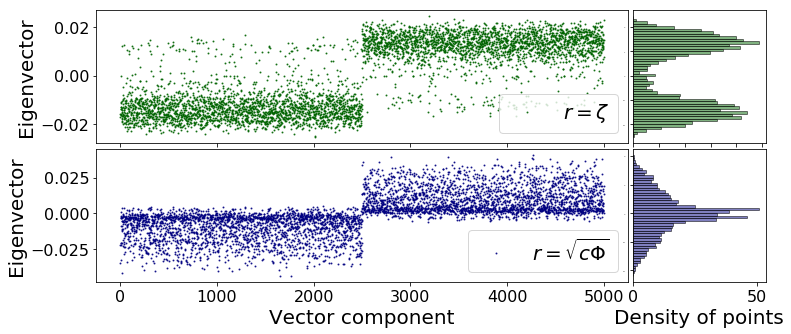

In [4]:
# from matplotlib import gridspec

# fig = plt.figure(figsize=(12, 5)) 
# gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1]) 
# gs.update(wspace=0.015, hspace = 0.05)


# ax0 = plt.subplot(gs[0])


# ax0.set_ylabel('Eigenvector',fontsize = 20)
# currentAxis = plt.gca()
# ax0.tick_params(axis="x", labelsize=0)
# ax0.tick_params(axis="y", labelsize=16)
# sgn_v1 = np.sign(np.mean(v1[0:int(len(v)/2)]))
# ax0.plot(-sgn_v1*v1,'o',markersize = ms, color = 'darkgreen', label = r'$r = \zeta$',alpha = alpha_1)
# ax0.legend(loc = 4, fontsize = 20)


# ax1 = plt.subplot(gs[1])
# ax1.hist(v1,bins = 4*int(n**0.3), color = 'darkgreen',alpha = 0.5, edgecolor = 'black',orientation=u'horizontal', normed = True)
# ax1.tick_params(axis="x", labelsize=0)
# ax1.tick_params(axis="y", labelsize=0)
# ax1.set_xlabel('Density of points', fontsize = 0)

# ax2 = plt.subplot(gs[2])
# someX, someY = 0, 0
# fs = 15
# ax2.set_xlabel('Vector component',fontsize = 20)
# ax2.set_ylabel('Eigenvector',fontsize = 20)
# currentAxis = plt.gca()
# ax2.tick_params(axis="x", labelsize=16)
# ax2.tick_params(axis="y", labelsize=16)
# sgn_v1 = np.sign(np.mean(v1[0:int(len(v)/2)]))
# ax2.plot(-sgn_w1*w1,'o',markersize = ms, color = 'navy', label = r'$r = \sqrt{c\Phi}$',alpha = alpha_1)
# plt.yticks([-0.025,0.,0.025])
# ax2.legend(fontsize = 20, loc = 4)

# ax3 = plt.subplot(gs[3])
# ax3.hist(w1,bins = 4*int(n**0.3), color = 'navy',alpha = 0.5, edgecolor = 'black',orientation=u'horizontal', normed = True)
# ax3.tick_params(axis="x", labelsize=16)
# ax3.tick_params(axis="y", labelsize=0)
# ax3.set_xlabel('Density of points', fontsize = 20)

# plt.show();